# KNN Zoo Dataset

Implement a KNN model to classify the animals in to categories

In [2]:
import pandas as pd
zoo = pd.read_csv("/content/Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


EDA

In [3]:
zoo.shape

(101, 18)

In [4]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
zoo.index

RangeIndex(start=0, stop=101, step=1)

In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
#finding unique values

print(zoo['type'].unique())
print(zoo['catsize'].unique())

[1 4 2 7 6 5 3]
[1 0]


In [9]:
## finding value count
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [10]:
# to split the observation into the two part we find median

print("mean is: ",zoo['type'].mean())
print("median is: ",zoo['type'].median())

mean is:  2.8316831683168315
median is:  2.0


In [11]:
# we split the varibales into two parts using median
type = []
for value in zoo['type']:
    if value<=2:
        type.append(0)
    else:
        type.append(1)

zoo['type'] = type

In [12]:
zoo['type'].value_counts()

0    61
1    40
Name: type, dtype: int64

In [13]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [14]:
zoo.corr()

<ipython-input-14-121fd7667a4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  zoo.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.533473
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.402381
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.601075
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.669393
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,-0.166708
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.411806
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.114934
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.130738
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.575085
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.632703


In [15]:
# rename the Columns
zoo.rename({"animal name": 'animal_name'},axis = 1,inplace =True)

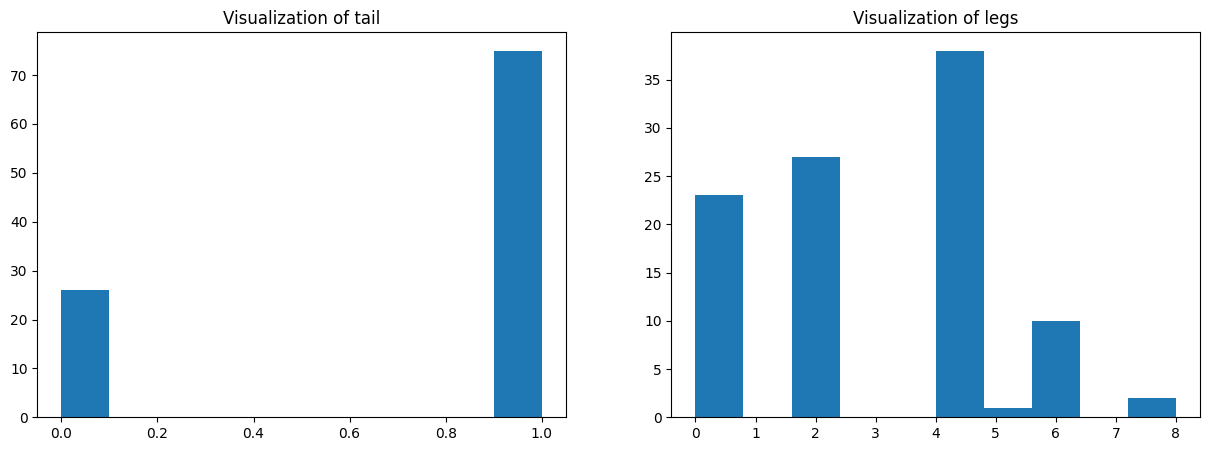

In [16]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize=(15,5))
ax[0].hist('tail',data = zoo); ax[0].set_title('Visualization of tail')
ax[1].hist('legs', data = zoo); ax[1].set_title("Visualization of legs")
plt.show()

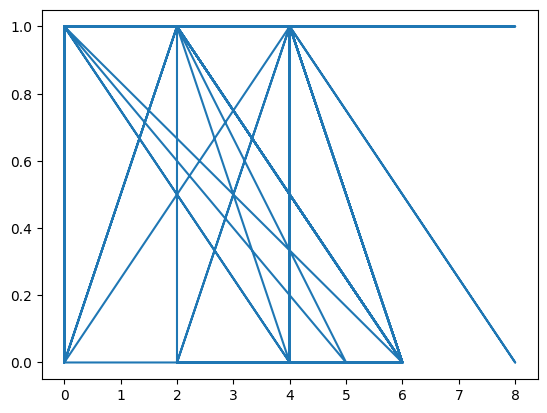

In [17]:
# Relationship between tail and legs if animals

plt.plot('legs','tail',data=zoo)

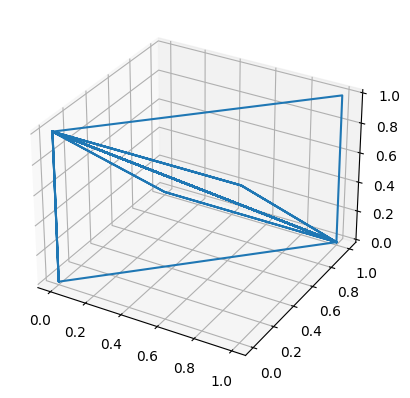

In [18]:
## 3D plot shows relation betwwem hair, eggs and milk

p = zoo['hair']
q = zoo['milk']
r = zoo['eggs']

from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

In [19]:
## Drop unneccessary columns for dataset

zoo.drop("animal_name",axis = 1,inplace = True)

In [20]:
## check data types

zoo.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

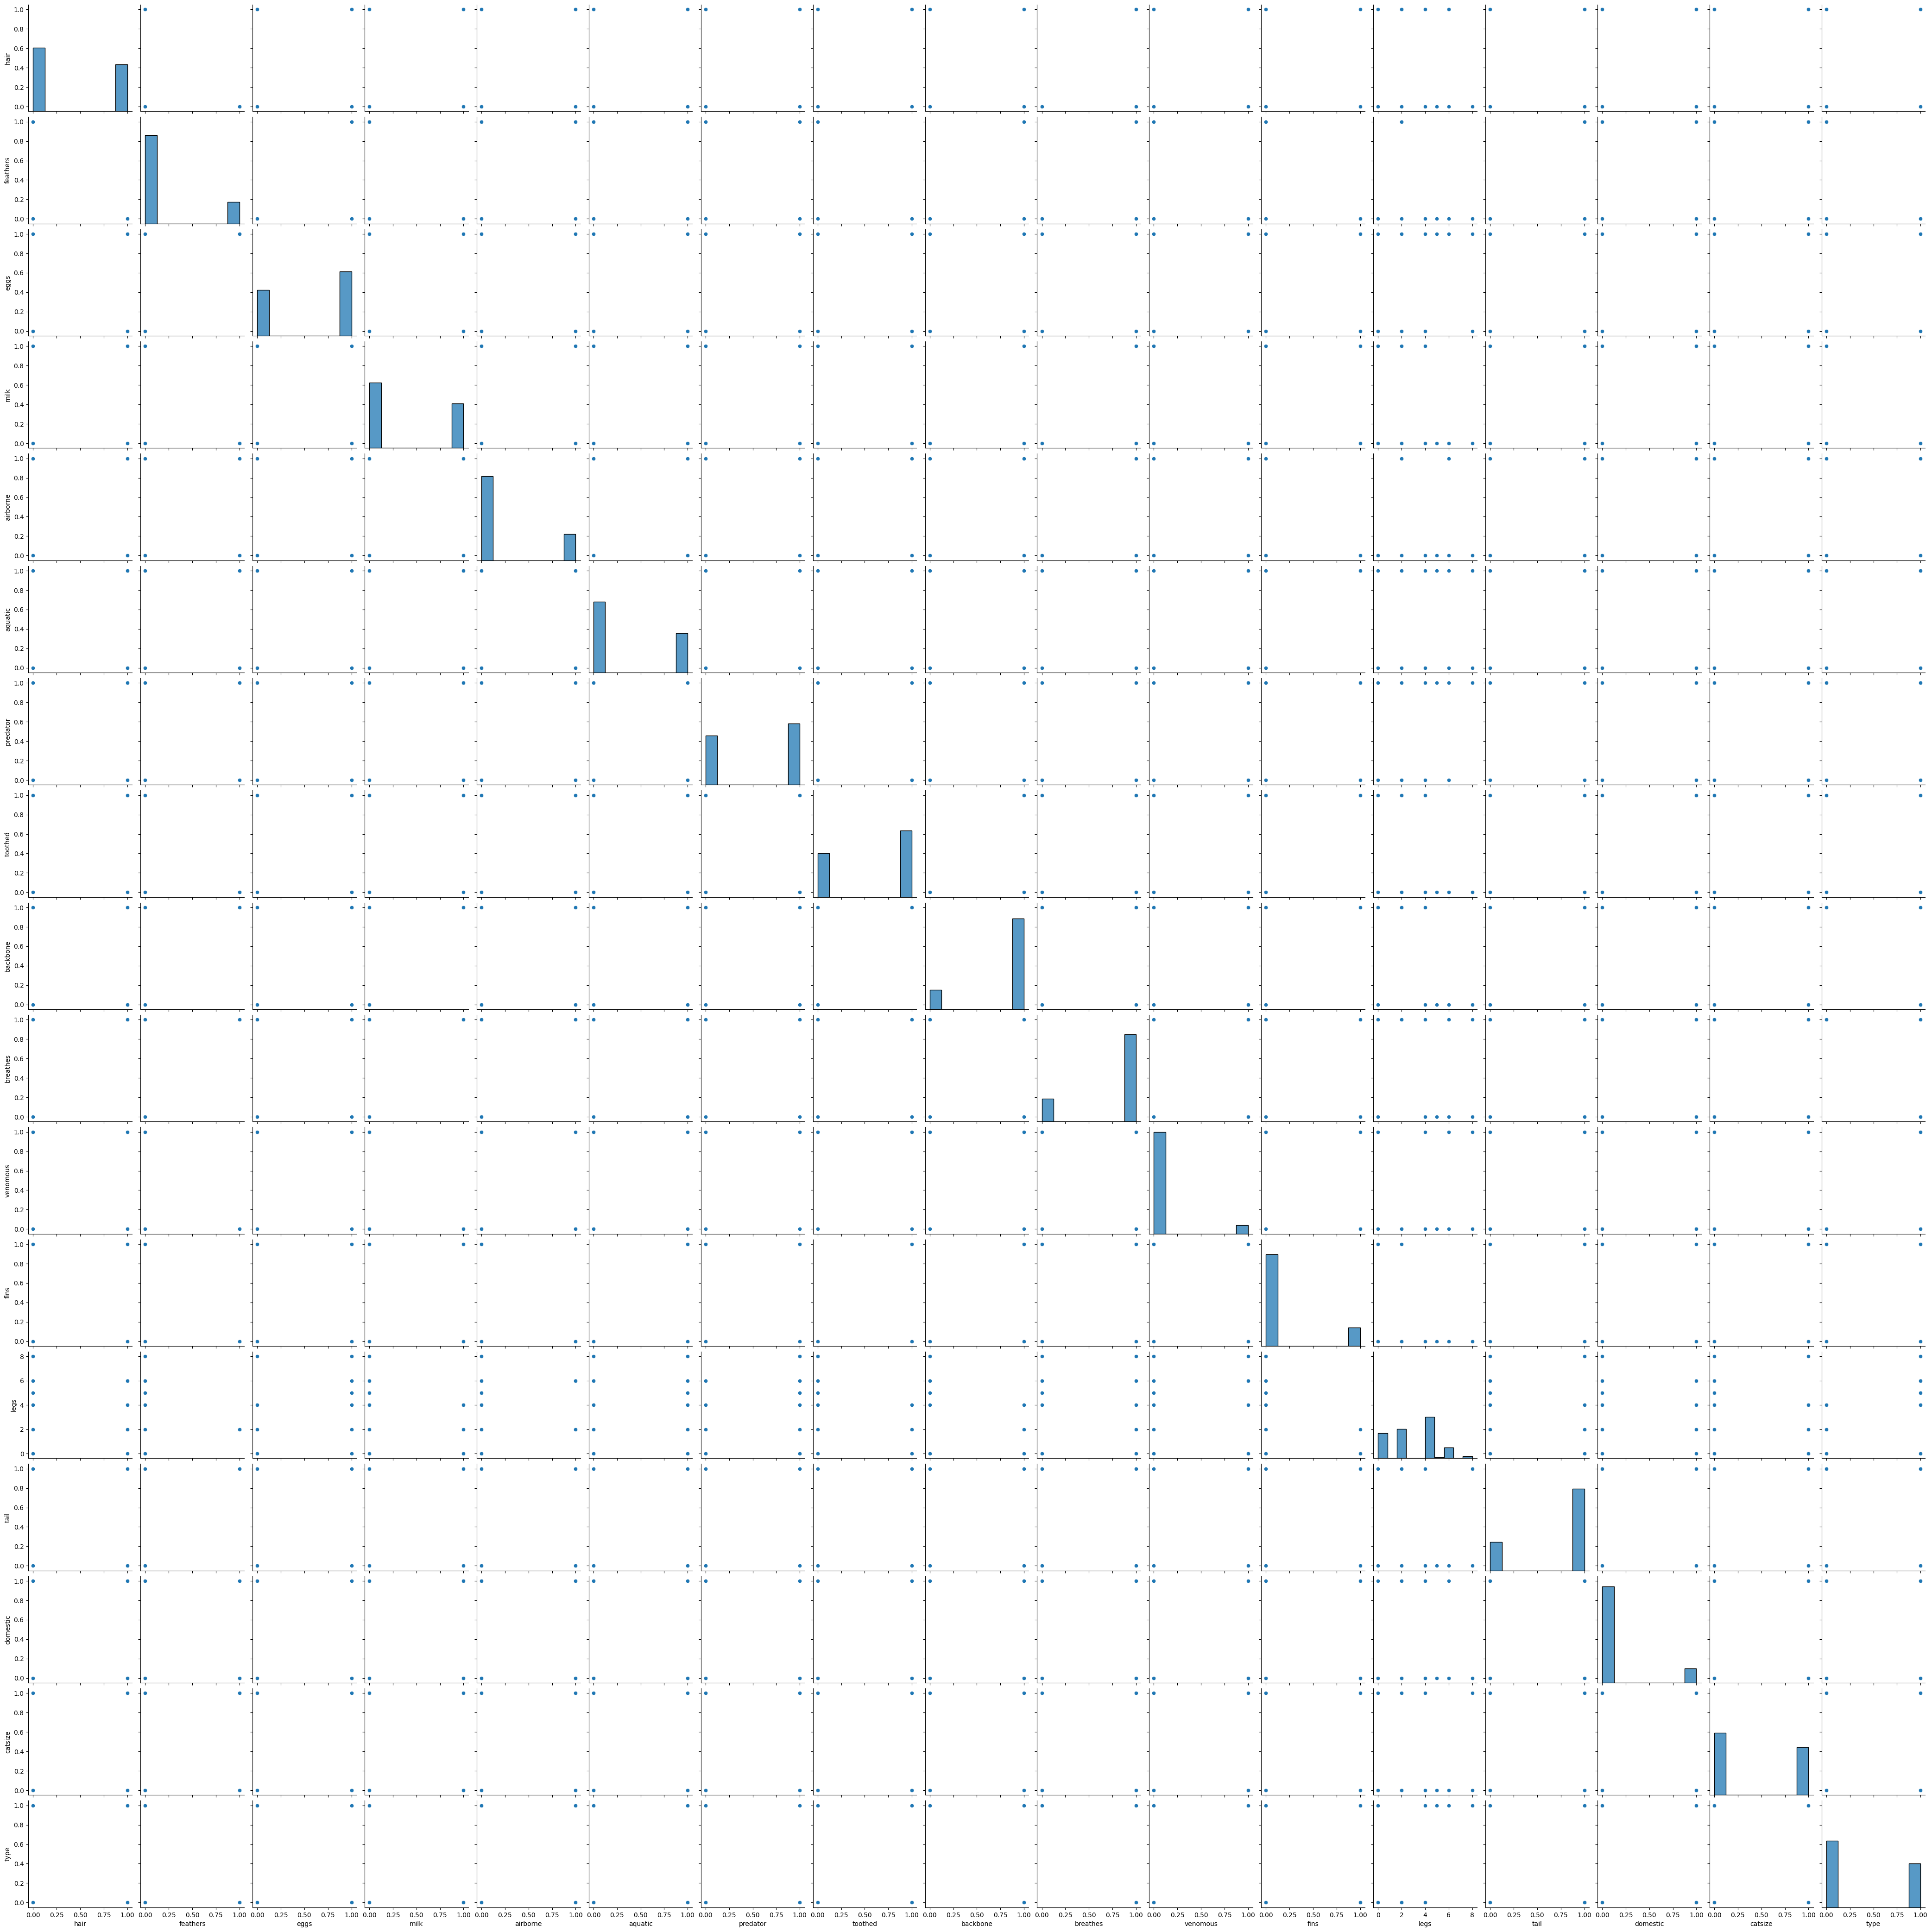

In [21]:
# plot pairplot for visualization all in ane.

import seaborn as sns
sns.pairplot(zoo)
plt.show()

In [22]:
zoo.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

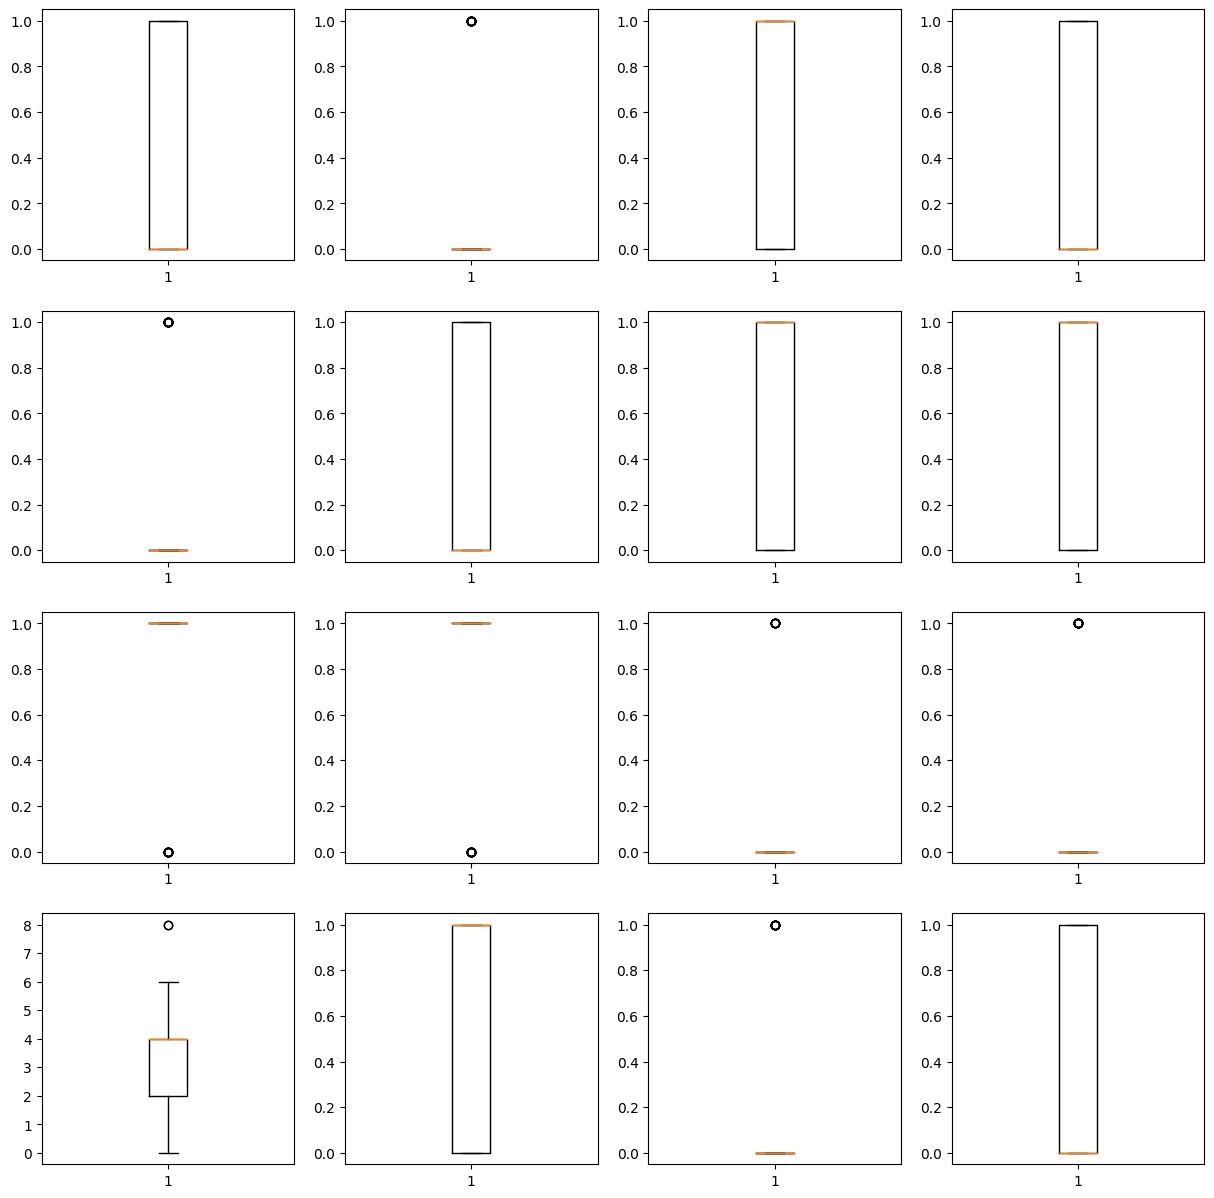

In [23]:
# Plot Boxplot To find outliers exist or not
fing, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15,15))
ax[0,0].boxplot(zoo['hair'])
ax[0,1].boxplot(zoo['feathers'])
ax[0,2].boxplot(zoo['eggs'])
ax[0,3].boxplot(zoo['milk'])
ax[1,0].boxplot(zoo['airborne'])
ax[1,1].boxplot(zoo['aquatic'])
ax[1,2].boxplot(zoo['predator'])
ax[1,3].boxplot(zoo['toothed'])
ax[2,0].boxplot(zoo['backbone'])
ax[2,1].boxplot(zoo['breathes'])
ax[2,2].boxplot(zoo['venomous'])
ax[2,3].boxplot(zoo['fins'])
ax[3,0].boxplot(zoo['legs'])
ax[3,1].boxplot(zoo['tail'])
ax[3,2].boxplot(zoo['domestic'])
ax[3,3].boxplot(zoo['catsize'])
plt.show()

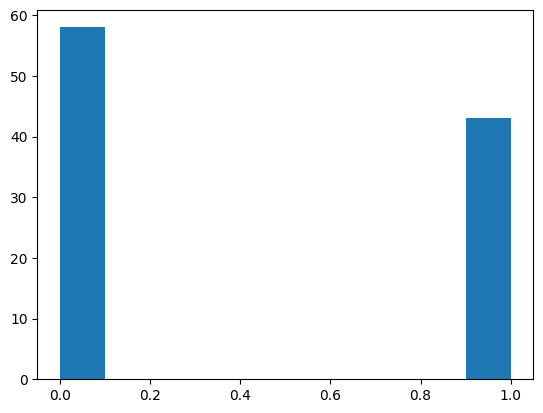

In [24]:
## Histogram

plt.hist(zoo['hair'])
plt.show()

# KNN Classification

In [25]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Dividing dataset into input and output
array = zoo.values
X, Y = array[:,:-1], array[:, -1]
print(X)
print(Y)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]]
[0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0]


In [27]:
print(X.shape)
print(Y.shape)

(101, 16)
(101,)


In [28]:
kfold = KFold(n_splits = 10)

In [29]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.9100000000000001


Grid Search for algorithum tuning

In [30]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [31]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [32]:
print(grid.best_score_)

0.99


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
import pickle

In [34]:
zoo.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [35]:
# Dividing dataset into input and output
X = zoo.iloc[:,:-1]
Y = zoo.iloc[:,-1]
print(X)
print(Y.unique())

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [36]:
# Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [37]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [38]:
# Predict for X Dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [39]:
y_pred_zoo = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})
y_pred_zoo

,actual,predicted_prob
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
96,0,0
97,1,1
98,0,0
99,1,1


In [40]:
# Confusion Matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[61  0]
 [ 0 40]]


In [41]:
((61+40)/(61+0+0+40))*100


100.0

In [42]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        40

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



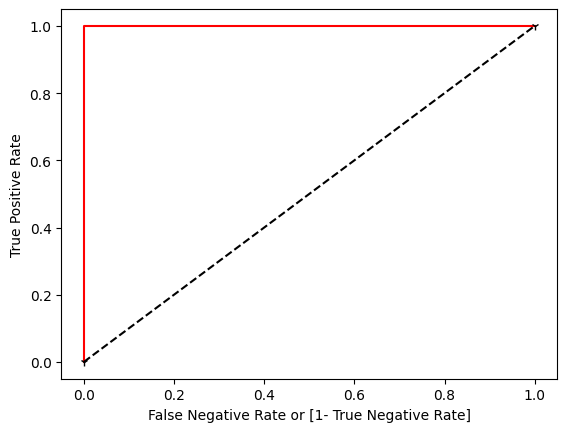

In [43]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel("False Negative Rate or [1- True Negative Rate]"); plt.ylabel('True Positive Rate')
plt.show()

In [44]:
# Accuracy
auc

1.0

**Decision** **Tree**

In [45]:
# Model Building, Training , Testing is already done in logistic regression.
# Splitting data into training and testing data sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 40)

In [46]:
# Building Decision Tree Classifier Using Entropy Criteria.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
model

DecisionTreeClassifier(max_depth=3)

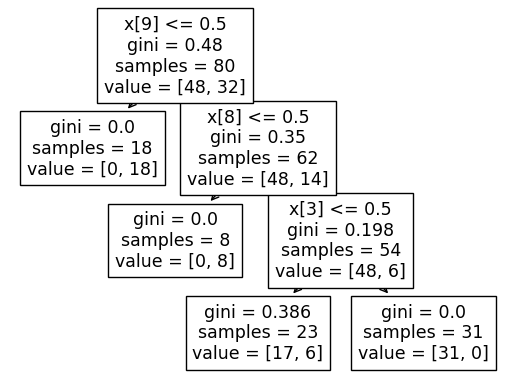

In [48]:
#plot the decision tree
from sklearn import tree
tree.plot_tree(model);


In [49]:
Y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [50]:
col = zoo.columns
col

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [51]:
zoo['type'].value_counts()

0    61
1    40
Name: type, dtype: int64

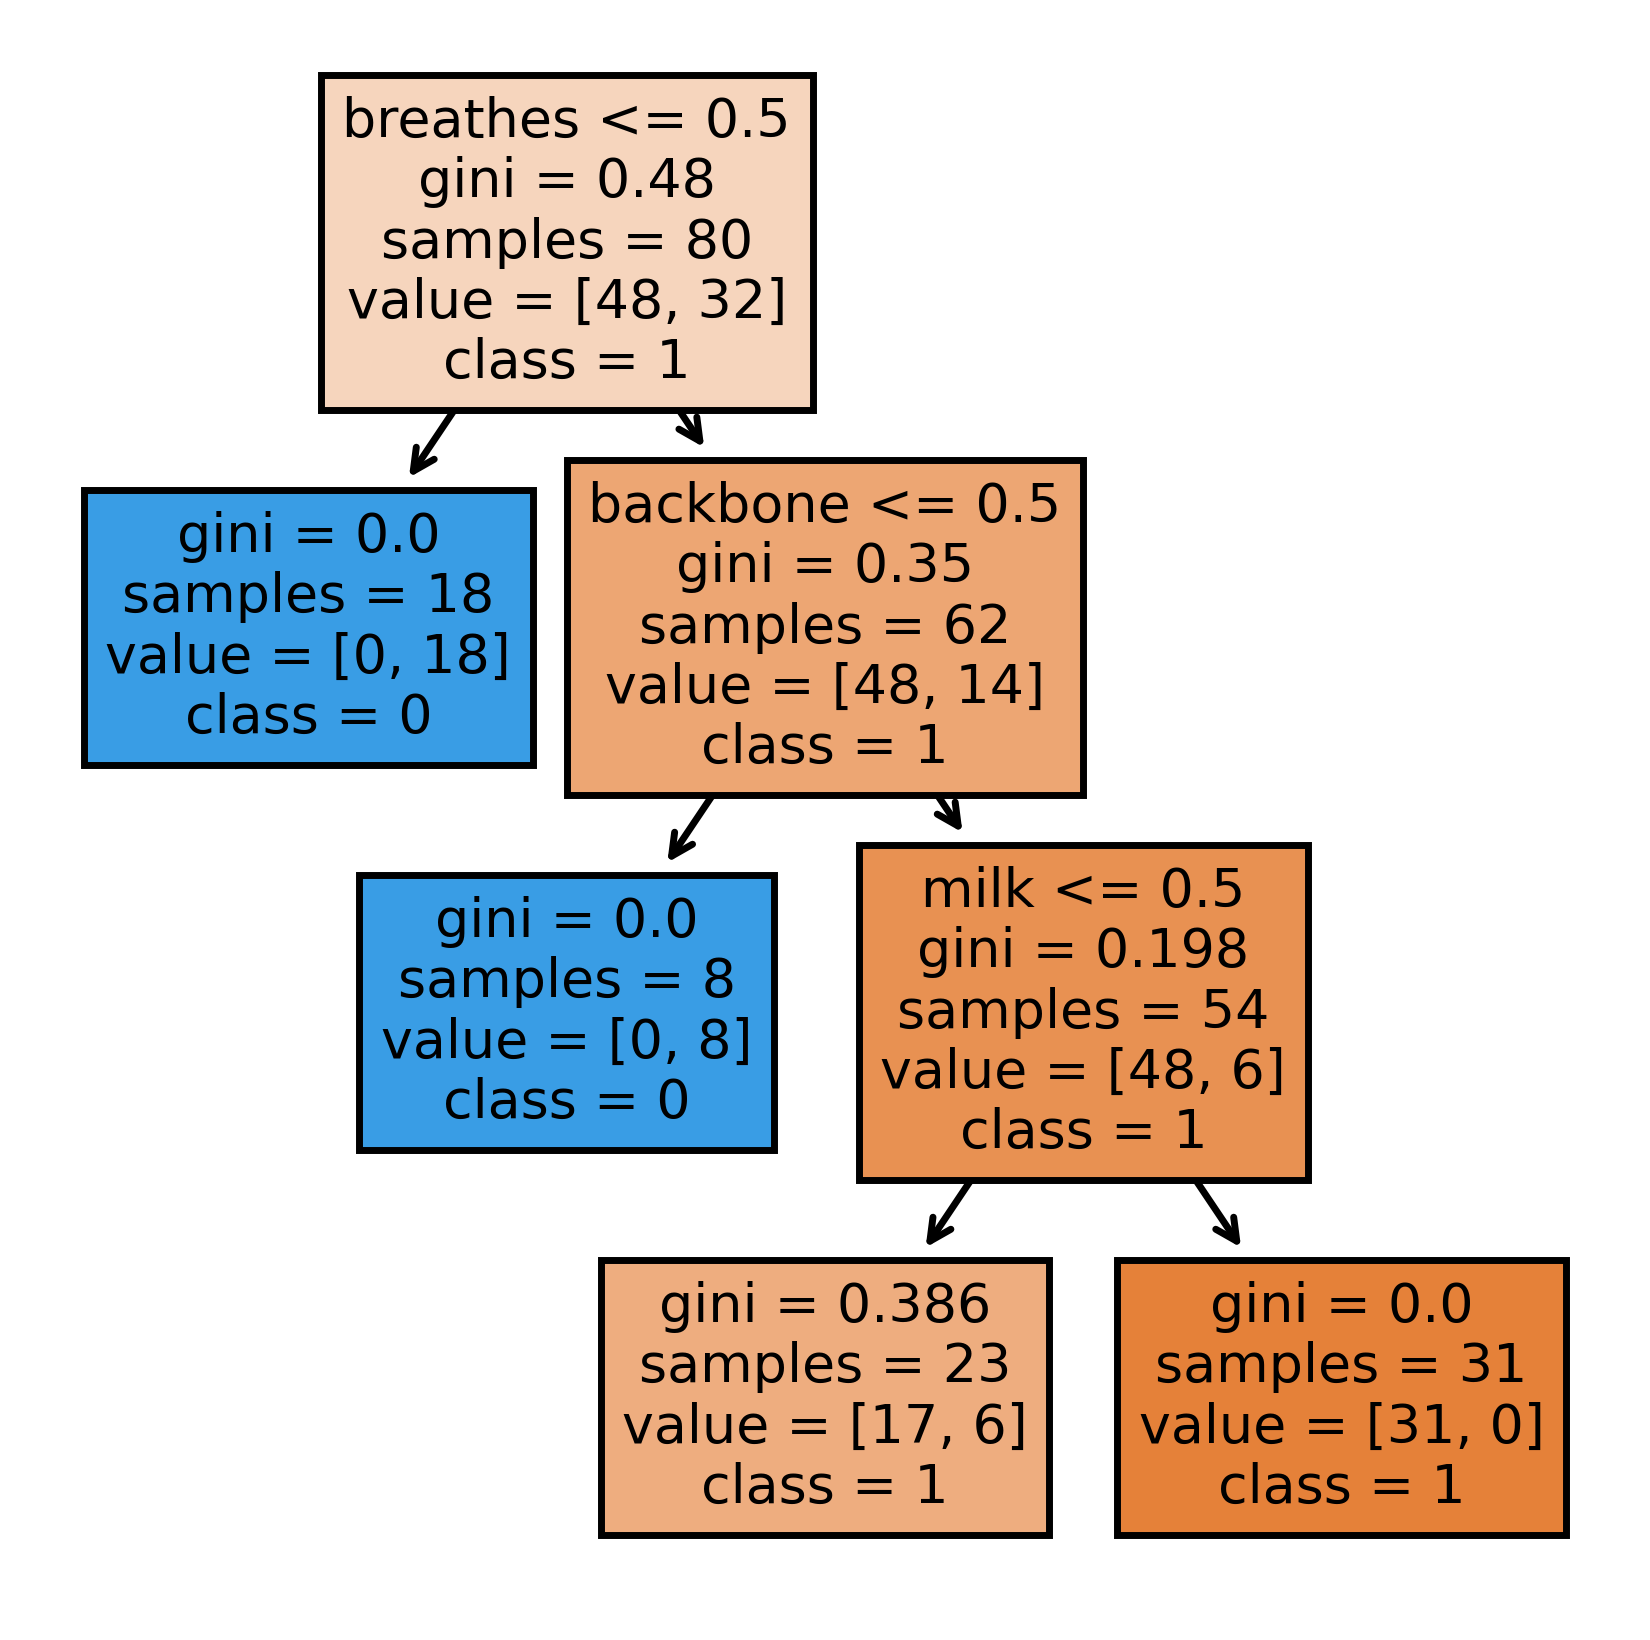

In [52]:
from sklearn import tree


col = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize']
cn = ['1','0']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [53]:
# Predicting on test data
preds = model.predict(X_test)
  # Predicting on test data set
pd.Series(preds).value_counts()
 # Getting the count of each category

0    15
1     6
dtype: int64

In [54]:
Y_test.value_counts()

0    13
1     8
Name: type, dtype: int64

In [55]:
preds

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [56]:
# Getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(Y_test , preds)

col_0,0,1
type,,
0,13,0
1,2,6


In [57]:
preds , Y_test

(array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]),
 80    1
 75    0
 63    0
 15    1
 38    1
 11    0
 40    1
 45    0
 39    1
 62    1
 84    0
 4     0
 47    0
 27    0
 76    1
 17    0
 87    0
 33    0
 9     0
 93    0
 72    1
 Name: type, dtype: int64)

In [58]:
#  Find the Accuracy
from sklearn.metrics import accuracy_score
np.mean(preds == Y_test), accuracy_score(Y_test, preds)

(0.9047619047619048, 0.9047619047619048)

In [59]:
# Building Decision Tree Classifier (CART) using Gini Criteria.
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [60]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
# Prediction and Computing the accuracy
pred = model.predict(X_test)
np.mean(preds == Y_test)

0.9047619047619048

In [62]:
# Decision Tree Regression Example
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [63]:
# Find the accuracy
model.score(X_test, Y_test)

0.9411764705882353

# SVM

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
x_tr, x_t, y_tr, y_t = train_test_split(X , Y, test_size = 0.3)

In [67]:
x_tr.shape, y_tr.shape, x_t.shape, y_t.shape

((70, 16), (70,), (31, 16), (31,))

In [68]:
# Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 300)
gsv.fit(x_tr,y_tr)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=300)

In [69]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'linear'}, 1.0)

In [70]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_t)
acc= accuracy_score(y_t, y_pred) * 100
print('Accuracy is: ', acc)
confusion_matrix(y_t, y_pred)

Accuracy is:  100.0


array([[22,  0],
       [ 0,  9]])